In [1]:
import calendar
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import sqlite3

All imports, needed for this project, in alphabetical order.

In [2]:
url = "https://api.fortnitetracker.com/v1/profile/account/b7c3c6c66e08499eade89c43f31ea2be/matches"
headers = {'TRN-Api-Key':'07678e9b-0fe4-447b-907d-8d141073f496'}

r = requests.get(url, headers=headers)

Requesting data from the Fortnite TRN match traker API

In [3]:
r

<Response [200]>

Response [200] All is well!

In [4]:
datasnapshot = r.json()
conn = sqlite3.connect('duo_beta_db.db')
JumbData = pd.DataFrame.from_dict(datasnapshot)
JumbData.to_sql("Jumb player data", conn, if_exists = 'append')


reading the Json data nad saving it to a Pandas Data Frame

In [5]:
#SQL QUERY
query = 'select * from "Jumb Player Data"'

#Python to pull the output of SQL Query into a pandas dataframe(saved as 'games')
games = pd.read_sql(query, conn)

In [6]:
games = games.drop_duplicates(['id'], keep = 'first')

Removing any duplicate files from the data set.

In [7]:
len(games)
games

,index,dateCollected,id,kills,matches,playlist,score,top1,top10,top12,top25,top3,top5,top6,trnRating
0,0,2018-10-20T18:32:28.1830000,888171863,1,2,p9,358,0,0,0,0,0,0,1,1270.2
1,1,2018-10-20T18:32:28.1800000,888171862,4,2,p10,146,0,0,0,0,0,0,0,1193.2
2,2,2018-10-20T17:46:19.8430000,887988136,12,2,p2,494,0,1,0,1,0,0,0,1259.9
3,3,2018-10-20T17:36:12.3630000,887948653,11,8,p2,720,0,0,0,2,0,0,0,1144.9
4,4,2018-10-20T01:50:14.5900000,885504080,0,1,p9,32,0,0,0,0,0,0,0,1351.8
5,5,2018-10-20T01:24:33.6300000,885434996,10,3,p9,896,1,0,0,0,1,0,1,1449.4
6,6,2018-10-20T00:52:43.7470000,885347553,9,7,p9,1173,0,0,0,0,0,0,1,1245.3
7,7,2018-10-20T00:52:43.7170000,885347551,43,11,p10,2157,0,0,3,0,0,3,0,1193.5
8,8,2018-10-18T10:59:08.6030000,879857345,59,29,p2,3676,0,2,0,8,0,0,0,1197.5
9,9,2018-10-18T10:59:08.5870000,879857343,1,2,p10,134,0,0,0,0,0,0,0,1179.2


Making sure the data looks accurate and has all the needed information

In [8]:
query = "Select sum(kills) kills, sum(matches) matches, ((sum(kills)/1.0)/sum(matches)) kpm, "\
"CAST(strftime('%w',substr(dateCollected, 0, 11)) as integer) dayofweek, strftime('%W',substr(dateCollected, 0, 11)) weeknumber from 'Jumb player data' group by weeknumber, dayofweek order by weeknumber, dayofweek"

player2 = pd.read_sql(query, conn)

gameweek = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 0:6}

for index, row in player2.iterrows():
    weekday = row['dayofweek']
    player2.at[index, 'dayofweek'] = gameweek[weekday]

player2 = player2.sort_values(by=['weeknumber', 'dayofweek'])

Querying the data to group all the matches by what day they were played on.
Making a new Data Frame for this new view of the data
Changing the week to put Sunday and the end

Sorting the data

In [9]:
player2

,kills,matches,kpm,dayofweek,weeknumber
1,45,25,1.800000,3,41
2,803,406,1.977833,4,41
3,1656,552,3.000000,5,41
0,432,240,1.800000,6,41
4,120,72,1.666667,0,42
5,864,456,1.894737,1,42
6,1728,888,1.945946,3,42
7,2160,864,2.500000,5,42
8,3496,1771,1.974026,1,43
9,1679,1104,1.520833,3,43


Quick visual check of this new data.

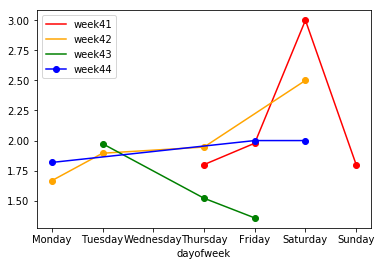

In [11]:
ax = plt.gca()

player2.loc[player2['weeknumber'] == '41'].plot(kind='line', x= 'dayofweek', y='kpm', color='red', marker= 'o', label = "week41", ax=ax)
player2.loc[player2['weeknumber'] == '42'].plot(kind='line', x= 'dayofweek', y='kpm', color='orange', marker= 'o', label = "week42", ax=ax)
player2.loc[player2['weeknumber'] == '43'].plot(kind='line', x= 'dayofweek', y='kpm', color='green', marker= 'o', label = "week43", ax=ax)
player2.loc[player2['weeknumber'] == '44'].plot(kind='line', x= 'dayofweek', y='kpm', color='blue', marker= 'o', label = "week44", ax=ax)
plt.xticks([0, 1, 2, 3, 4, 5, 6],["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


plt.show()

Plotting each week in a different color to get a picture of week to week progress and day of week similarities.

Best scores are on Saturdays. Least played day is Wednesday. Most played days are Thurday, Friday, and Saturday. As for increased skill as the weeks progress there doesn't seem to be enough information to give a clear answer or just not enough growth to really determine. If anything the skill has gone down week to week.